In [10]:
# Oppgave 1f
def iterate(f, x, dfdx, tolerance=1.0E-2, max_n=5):
    n = 0
    # while abs(g(x))= abs(1-x) >tolerance and n<=max_n
    # while abs(g(1))= abs(0) >tolerance and n<=max_n --> not true = False
    # while abs(g(12.5))= abs(1-12.5) >tolerance and n=0 <=max_n --> True
    # while abs(g(1))= abs(1-1) >tolerance and n=1 <=max_n --> not true --> False 
    while abs(f(x)) > tolerance and n <= max_n:
        x = x - f(x)/dfdx(x)
        # x = x + g(x)/1 = x + (1-x) = 1 
        # x = x + g(x)/1 = 12.5 + (1-12.5) = 1
        n += 1
    if n > max_n: # n = 0 > 5 --> not true = False
        raise ValueError('Iteration did not converge')
    else:
        return x, f(x) # 1 0 

def g(t):
    return 1-t
    

def dgdt(t):
    return -1

print type(g)
print type(dgdt)

print iterate(g, 1, dgdt)
print iterate(g, 12.5, dgdt) #g unknown, dgdt = -1

<type 'function'>
<type 'function'>
(1, 0)
(1.0, 0.0)


In [17]:
"""
First iterate will produce:
1 0 
Second will give output:
1 0 

x_ [2, 3, 4]
y_ [2, 3, 4]

x_  y_  x!=y  and x>y+1
2   2   false
2   3     true  false
2   4     true    false
3   2      true   false
3   3     false
3   4      true    false
4   2       true    true
4   3     true     false
4   4     false

output: 4 2
"""
import numpy as np
A = [[0, 0], [0, -1], [1, 3], [2, 4], [0, -2]]
print A[2]
print (A[3])[1]
print A[2:]
B = A[3]
print B[1]
print A[4][-1]

[1, 3]
4
[[1, 3], [2, 4], [0, -2]]
4
-2


In [29]:
numbers = (1, 4, 8, 3, 'hei') # tuples are constant
numbers2 = [1, 4, 8, 3, 'hei']
k = numbers[1]
try:
    element = float(numbers[k])
    print 'element=%f' % element
except IndexError:
    print 'Index %d > %d' % (k, len(numbers))
except ValueError:
    print 'Could not convert  to float' , (numbers[k])
print type(numbers2)
print numbers2
numbers2[2] = 2
print numbers2

Could not convert  to float hei
<type 'list'>
[1, 4, 8, 3, 'hei']
[1, 4, 2, 3, 'hei']


In [41]:
# Exercise 2
#from feet/second to meter/s
inch_in_meter = 2.54/100 # in order to get meters
foot_in_meter = 12 * inch_in_meter # meter/feet
def fts2ms(v):
    # ft/s * m/ft --> m/s
    return v*foot_in_meter
print fts2ms(3)

0.9144


In [49]:
#Ex3
#write a fn area that returns the area f a triangle
# 

vertices = [[0,0],[1,0],[0,2]]
quadrilateral = [[0,0], [2,4], [4,3], [3.5,0.5]]
triang1 = [[0,0], [4,3],[2,4]]
triang2 = [[0,0], [3.5,0.5], [4,3]]
def area(v):
    x1 = v[0][0]
    x2 = v[1][0]
    x3 = v[2][0]
    y1 = v[0][1]
    y2 = v[1][1]
    y3 = v[2][1]
    return 0.5 * (x2*y3 - x3*y2 - x1*y3 + x3*y1 + x1*y2 -x2*y1)
area_quadrilateral = area(triang1) + area(triang2)
#print area(triang1) , area(triang2)
print area_quadrilateral

9.25


[  3.00000000e+00  -4.50000000e+00   2.02500000e+00  -4.33928571e-01
   5.42410714e-02  -4.43790584e-03   2.56033029e-04  -1.09728441e-05
   3.63072048e-07  -9.55452758e-09   2.04739877e-10]


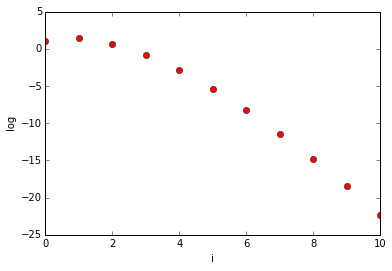

In [83]:
#Ex4

#DO THIS ALL OVER AGAIN

#make a fn terms
import math
import matplotlib.pyplot as plt
%matplotlib inline
def terms(ti,x_0, N):
    i = 0
    t_list = []
    # for elements in array
    for i in range(0,N+1):
        t = ti(i,x_0)
        t_list.append(t)
    return np.array(t_list)

def ti_sin (i, x_0):
    return (-1)**i*((x_0**(2*i+1))/math.factorial(2*i+1))

def visualize(t):
    for i in range(0,len(t)):
        plt.plot(i, math.log(abs(t[i])),'ro',)
    plt.xlabel('i')
    plt.ylabel('log')
    plt.show()
    #plot the log(abs(t[i]) 
    
t = terms(ti_sin,3.0,10)
print t
visualize(t)

In [22]:
# Exercise 5
import math 
def gfunc(t):
    a = 2
    g = math.exp(-a*t)
    dgdt = -a*math.exp(-a*t)
    return g, dgdt

def newton(gfunc_ref, x_0, tol=1e-12, max_n=10):
    x_n = x_0
    for n in range(max_n):
        g_n ,dgdx = gfunc_ref(x_n)  # = gfunc(x_n)
        x_n = x_n - g_n/dgdx
        convcrit = abs(g_n) <= tol
        print n, x_n, g_n, dgdx
        if convcrit:
            print 'We have found an approximate solution:'
            return x_n
    if abs(g_n) >= tol:
        raise ValueError('convergence not met')
    
x_solution = newton(gfunc, 1, 1e-10,100)
print x_solution
print gfunc(x_solution)
print gfunc

0 1.5 0.135335283237 -0.270670566473
1 2.0 0.0497870683679 -0.0995741367357
2 2.5 0.0183156388887 -0.0366312777775
3 3.0 0.00673794699909 -0.0134758939982
4 3.5 0.00247875217667 -0.00495750435333
5 4.0 0.000911881965555 -0.00182376393111
6 4.5 0.000335462627903 -0.000670925255805
7 5.0 0.000123409804087 -0.000246819608173
8 5.5 4.53999297625e-05 -9.0799859525e-05
9 6.0 1.67017007902e-05 -3.34034015805e-05
10 6.5 6.14421235333e-06 -1.22884247067e-05
11 7.0 2.26032940698e-06 -4.52065881396e-06
12 7.5 8.31528719104e-07 -1.66305743821e-06
13 8.0 3.05902320502e-07 -6.11804641004e-07
14 8.5 1.12535174719e-07 -2.25070349439e-07
15 9.0 4.13993771879e-08 -8.27987543757e-08
16 9.5 1.52299797447e-08 -3.04599594894e-08
17 10.0 5.60279643754e-09 -1.12055928751e-08
18 10.5 2.06115362244e-09 -4.12230724488e-09
19 11.0 7.58256042791e-10 -1.51651208558e-09
20 11.5 2.78946809287e-10 -5.57893618574e-10
21 12.0 1.02618796317e-10 -2.05237592634e-10
22 12.5 3.77513454428e-11 -7.55026908856e-11
We have found

In [23]:
"""
New things I need to learn:
1) raise error
2) funksjonsreferanse
"""

'\nNew things I need to learn:\n1) raise error\n2) funksjonsreferanse\n'

In [24]:
def ti_sin (i, x_0):
    return (-1)**i*((x_0**(2*i+1))/math.factorial(2*i+1))

In [37]:
# Comparing Assert and raise Error

def demo_function(positive_number):
    assert positive_number >= 0, 'Number not positive'

def demo_function2(positive_number):
    if positive_number < 0:       # showing steps in assert
        raise AssertionError('Number not positive')

# Catching errors
# 1) when arv is too short -> IndexError
# 2) when we cant convert to float -> ValueError

try:
    root = 1 +1j
    assert not isinstance(root, complex), 'Expected real root'
except AssertionError, e:
    print e
    
try:
    f = float('hei')
except ValueError:
    print 'Cant convert'
    
try:
    a = [1,2,3]
    b = a[3]
except IndexError:
    print 'Out of range'

print 'Those two functions are exactly the same!'
try:
    demo_function2(-1)
except AssertionError:
    print 'As expected, -1 is not positive'

Expected real root
Cant convert
Out of range
Those two functions are exactly the same!
As expected, -1 is not positive


In [38]:
# List comprehension

a = []
for i in range(10):
    a.append(i)
print a

#Huskeregel: for element in list

# Make a list 'b' that is like a
# Remember [(What is appended?)  (the for-definition)] 
# eg. [(could be a formula f(n))  (for n in range()/linspace())] 

b = [i for i in range(10)]
print b

c = []
for n in range(5,10):
    c.append(n**2)
print c

d = [n**2 for n in range(5,10)]
print d

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[25, 36, 49, 64, 81]
[25, 36, 49, 64, 81]


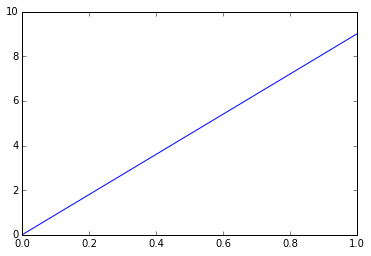

In [8]:
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
%matplotlib inline
#from os import system

plt.ion() #interactive on

x = np.linspace(0, 1, 100)

for i in range(10): 
    plt.clf() #clear figure
    plt.plot(x, x*i)
    plt.axis([0, 1, 0, 10])
    plt.draw()
    #savefig('anim_%04d.png' % i)
    sleep(0.2)
#system('covert *.png anim.gif')
#system('rm *.png')

plt.ioff()
plt.show()

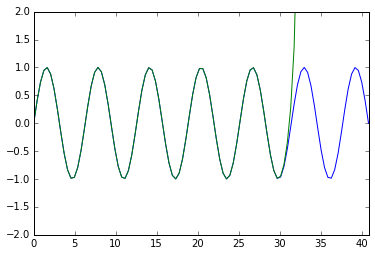

In [9]:
"""Making animations with matplotlib is slightly more complex
than using scitools, since simple plot commands inside a for-loop
will not work. Instead, we grab the object returned by the plt.plot
command, and then update the y-data and call plt.draw()
for each iteration of the for-loop. We also need to call plt.ion() to
turn on the interactive mode to make the plots visible.
"""
"""Exercise 5.37: Animate the evolution of Taylor polynomials
A general series approximation (to a function) can be written as
S(x; M, N) =
N
k=M
fk(x).
For example, the Taylor polynomial of degree N for ex equals S(x; 0, N)
with fk(x) = xk/k!. The purpose of the exercise is to make a movie of
how S(x; M, N) develops and improves as an approximation as we add
terms in the sum. That is, the frames in the movie correspond to plots
of S(x; M, M), S(x; M, M + 1), S(x; M, M + 2), . . ., S(x; M, N).
a) Make a function
animate_series(fk, M, N, xmin, xmax, ymin, ymax, n, exact)
for creating such animations. The argument fk holds a Python function
implementing the term fk(x) in the sum, M and N are the summation
limits, the next arguments are the minimum and maximum x and y
values in the plot, n is the number of x points in the curves to be plotted,
and exact holds the function that S(x) aims at approximating.
Hint. Here is some more information on how to write the
animate_series function. The function must accumulate the fk(x)
terms in a variable s, and for each k value, s is plotted against x together
with a curve reflecting the exact function. Each plot must be saved in
a file, say with names tmp_0000.png, tmp_0001.png, and so on (these
filenames can be generated by tmp_%04d.png, using an appropriate
counter). Use the movie function to combine all the plot files into a
movie in a desired movie format.
In the beginning of the animate_series function, it is necessary to
remove all old plot files of the form tmp_*.png. This can be done by the
glob module and the os.remove function as exemplified in Section 5.3.4.
b) Call the animate_series function for the Taylor series for sin x,
where fk(x) = (−1)kx2k+1/(2k + 1)!, and x ∈ [0, 13π], M = 0, N = 40,
y ∈ [−2, 2].
c) Call the animate_series function for the Taylor series for e−x, where
fk(x) = (−x)k/k!, and x ∈ [0, 15], M = 0, N = 30, y ∈ [−0.5, 1.4].
Filename: animate_Taylor_series.py."""

import numpy as np
import matplotlib.pyplot as plt
import math
import time
%matplotlib inline

def animate_series(fk,M,N,xmin,xmax,ymin,ymax,n,exact):
    import glob, os
    x = np.linspace(xmin,xmax,n)
    s = np.zeros_like(x)
    s_ref = exact(x)

    old_files = glob.glob('tmp_*.png')
    for file in old_files:
        os.remove(file)

    plt.ion() #turn matplotlib interactive mode on
    plt.plot(x,s_ref)
    lines = plt.plot(x,s)
    plt.axis([xmin,xmax,ymin,ymax])

    framenumber = 0
    for k in range(M,N+1):
        s += fk(x,k)
        lines[0].set_ydata(s)
        plt.draw()
        plt.savefig('tmp_%04d.png' %framenumber)
        framenumber += 1
        time.sleep(.5) #wait 0.5 seconds per frame

def taylor_sin(x,k):
    return (-1)**k*x**(2*k+1)/math.factorial(2*k+1)

animate_series(taylor_sin,0,40,0,13*math.pi,-2,2,100,np.sin)

def taylor_exp_mx(x,k):
    return (-x)**k/math.factorial(k)

def exp_mx(x):
    return exp(-x)

#animate_series(taylor_exp_mx,0,30,0,15,-0.5,1.4,100,exp_mx)

In [6]:
# Dictionaries
#likner på arrays
l = [4, 2, 1]
sys.argv = [5, 3]
d = {
    0: 'Par',
    1: 'Birdie',
    2: 'Eagle',
    - 1: 'Boogey',
    - 2: 'Double Boogey'
}

# kan være sammenheng mellom hva som helst av to variable

goal = int(sys.argv[1])
you = int(sys.argv[2])
points = goal - you
text_points = d[points]

print 'You got %s ' % text_points

NameError: name 'sys' is not defined

In [10]:
a = {
    0: 1,
    1: 2,
    2: 1
}
""" x**2 + 2*x +1"""
#bruker det ofte til å bygge opp dictionaries, legger til nye verdier i en dictionary
a[0]
a[1] = 5 #overskriver verdien over
for key in a: #for key in dictionary, vil loope over en dictionary
    print '%s is %s' %(key, a[key])
    
# bruke: er 2 i a? sjekk hva variablene dine er
    
if 2 in a:
    print 'Yes!'

0 is 1
1 is 5
2 is 1
Yes!


[ 4.          2.72727273  2.53846154  2.46808511  2.43243243  2.41121495
  2.39726027  2.38743455  2.38016529  2.37458194  2.37016575  2.36658933
  2.36363636  2.36115843  2.35905045  2.35723598  2.3556582   2.35427394
  2.35304991  2.35195997  2.35098336  2.35010338  2.34930643  2.34858135
  2.34791889  2.3473113   2.34675206  2.34623564  2.34575734  2.34531308
  2.34489938  2.34451319  2.34415187  2.34381309  2.34349483  2.34319527
  2.34291281  2.34264604  2.34239369  2.34215462  2.34192781  2.34171234
  2.34150739  2.34131221  2.34112611  2.34094848  2.34077875  2.34061641
  2.34046098  2.34031204  2.34016919  2.34003206  2.33990031  2.33977364
  2.33965175  2.33953439  2.3394213   2.33931226  2.33920705  2.33910547
  2.33900735  2.3389125   2.33882076  2.33873199  2.33864605  2.33856279
  2.3384821   2.33840386  2.33832797  2.3382543   2.33818278  2.3381133
  2.33804579  2.33798015  2.33791632  2.33785422  2.33779377  2.33773492
  2.3376776   2.33762175  2.33756732  2.33751425  2.

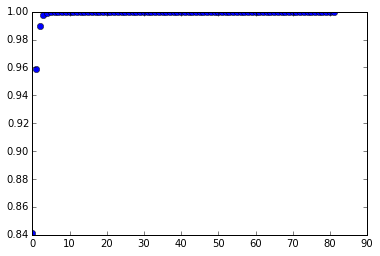

Dn  0.0


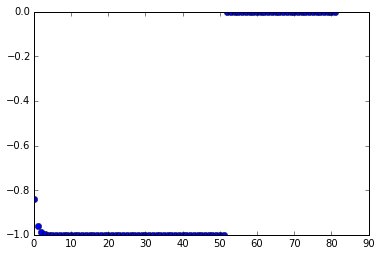

In [26]:
# Exercise A.1 page 628 Determine the limit of a sequence

from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
def sequence(n):
    a = zeros(n+1)
    
    for i in range(n+1):
        a[i] = (7.0 + 1.0/(i+1))/(3.0 - 1.0/(i+1)**2)
    return a

print sequence(100)
print 7.0/3

#b)
def limit(seq):
    for i in range(1, len(seq)-1): #husk: lengden av arrayen vi får inn
        if abs(seq[i]-seq[i+1]) >= abs(seq[i-1] - seq[i]) and seq[i] != seq[i - 1]: #hvis følgen ikke konvergerer returneres none
            return None
        return seq[-1]
    
print limit(sequence(100))
print limit(linspace(0, 100, 101)) #gir oss N+1 ? Skal altså ikke konvergere mot noe som helst

#c) Beregne og returnere en sinussekvens. Beregner approkimasjoner til den deriverte av sinus. 

def Dn_sin(N):
    n = linspace(0, N+1, N+2)
    return (sin(2**(-n))/2**(-n))

print Dn_sin(100)
print limit(Dn_sin(100))

# d)

def Dn(f, x, N):
    n = linspace(0, N+1, N+2)
    h = 2**(-n)
    return (f(x+h) - f(x))/h 

a = Dn(sin, 0, 80)

print 'Dn ', limit(a)
plt.plot(a, 'o')
plt.show()

# e) same as above, but use x = pi

def Dn(f, x, N):
    n = linspace(0, N+1, N+2)
    h = 2**(-n)
    return (f(x+h) - f(x))/h 

a = Dn(sin, pi, 80)

print 'Dn ', limit(a)
plt.plot(a, 'o')
plt.show

#f) Svar avrundingsfeil. h->0, vil diff gå mot null (teller og nevner går mot null), 
#ender opp i en situasjon hvor vi kun returnerer null i steden for å dele to små tall på hverandre.
#Spm: hvorfor går det ikke galt i første oppgave? skriv ut følgen